In [1]:
import pandas as pd 
import numpy as np

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('DelayedFlights.csv', index_col=0, parse_dates=['DepTime'])

C:\Users\38169\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936758 entries, 0 to 7009727
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            object 
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

In [23]:
df['DepTime']

0          2003.0
1           754.0
2           628.0
4          1829.0
5          1940.0
            ...  
7009710    1250.0
7009717     657.0
7009718    1007.0
7009726    1251.0
7009727    1110.0
Name: DepTime, Length: 1936758, dtype: object

In [3]:
df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [7]:
df.shape

(1936758, 29)

In [6]:
round(df.describe(),2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1936758.00,1936758.00,1936758.00,1936758.00,1936758.00,1929648.00,1936758.00,1936758.00,1928371.00,...,1936758.00,1929648.00,1936303.00,1936758.00,1936758.00,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,2008.0,6.11,15.75,3.98,1518.53,1467.47,1610.14,1634.22,2184.26,133.31,...,765.69,6.81,18.23,0.00,0.00,19.18,3.70,15.02,0.09,25.30
std,0.0,3.48,8.78,2.00,450.49,424.77,548.18,464.63,1944.70,72.06,...,574.48,5.27,14.34,0.02,0.06,43.55,21.49,33.83,2.02,42.05
min,2008.0,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,14.00,...,11.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2008.0,3.00,8.00,2.00,1203.00,1135.00,1316.00,1325.00,610.00,80.00,...,338.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2008.0,6.00,16.00,4.00,1545.00,1510.00,1715.00,1705.00,1543.00,116.00,...,606.00,6.00,14.00,0.00,0.00,2.00,0.00,2.00,0.00,8.00
75%,2008.0,9.00,23.00,6.00,1900.00,1815.00,2030.00,2014.00,3422.00,165.00,...,998.00,8.00,21.00,0.00,0.00,21.00,0.00,15.00,0.00,33.00
max,2008.0,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,9742.00,1114.00,...,4962.00,240.00,422.00,1.00,1.00,2436.00,1352.00,1357.00,392.00,1316.00


### Sta znace kolone? 

- Year 2008
- Month 1-12
- DayofMonth 1-31
- DayOfWeek 1 (Monday) - 7 (Sunday)
- DepTime actual departure time (local, hhmm)
- CRSDepTime scheduled departure time (local, hhmm)
- ArrTime actual arrival time (local, hhmm)
- CRSArrTime scheduled arrival time (local, hhmm)
- UniqueCarrier unique carrier code
- FlightNum flight number
- TailNum plane tail number: aircraft registration, unique aircraft identifier
- ActualElapsedTime in minutes
- CRSElapsedTime in minutes
- AirTime in minutes
- ArrDelay arrival delay, in minutes: A flight is counted as "on time" if it operated less than 15 minutes later the scheduled time shown in the carriers' Computerized Reservations Systems (CRS).
- DepDelay departure delay, in minutes
- Origin origin IATA airport code
- Dest destination IATA airport code
- Distance in miles
- TaxiIn taxi in time, in minutes
- TaxiOut taxi out time in minutes
- Cancelled was the flight cancelled
- CancellationCode reason for cancellation (A = carrier, B = weather, C = NAS, D = security)
- Diverted 1 = yes, 0 = no
- CarrierDelay in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.
- WeatherDelay in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.
- NASDelay in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.
- SecurityDelay in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.
- LateAircraftDelay in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [6]:
df.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [7]:
df.describe()

,Year,Month,DayofMonth,DayOfWeek,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,1.928371e+06,1.936560e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,1.333059e+02,1.343027e+02,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,7.206007e+01,7.134144e+01,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.400000e+01,-2.500000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,8.000000e+01,8.200000e+01,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,1.160000e+02,1.160000e+02,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,1.650000e+02,1.650000e+02,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,1.114000e+03,6.600000e+02,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


In [8]:
df.columns.to_list()

['Year',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'DepTime',
 'CRSDepTime',
 'ArrTime',
 'CRSArrTime',
 'UniqueCarrier',
 'FlightNum',
 'TailNum',
 'ActualElapsedTime',
 'CRSElapsedTime',
 'AirTime',
 'ArrDelay',
 'DepDelay',
 'Origin',
 'Dest',
 'Distance',
 'TaxiIn',
 'TaxiOut',
 'Cancelled',
 'CancellationCode',
 'Diverted',
 'CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']

In [9]:
round(df[['CarrierDelay',
 'WeatherDelay',
 'NASDelay',
 'SecurityDelay',
 'LateAircraftDelay']].describe(),2)

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1247488.00,1247488.00,1247488.00,1247488.00,1247488.00
mean,19.18,3.70,15.02,0.09,25.30
std,43.55,21.49,33.83,2.02,42.05
min,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,0.00
50%,2.00,0.00,2.00,0.00,8.00
75%,21.00,0.00,15.00,0.00,33.00
max,2436.00,1352.00,1357.00,392.00,1316.00


In [33]:
df['WeatherDelay'].value_counts()

0.0       1148570
10.0         2868
6.0          2738
15.0         2709
7.0          2527
           ...   
475.0           1
750.0           1
745.0           1
1352.0          1
510.0           1
Name: WeatherDelay, Length: 599, dtype: int64

In [10]:
### Droping na values for ArrDelay 

In [15]:
df.dropna(axis=0,subset=['ArrDelay'], inplace=True)

In [16]:
df.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                   0
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   3
ActualElapsedTime         0
CRSElapsedTime            0
AirTime                   0
ArrDelay                  0
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                    0
TaxiOut                   0
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         680883
WeatherDelay         680883
NASDelay             680883
SecurityDelay        680883
LateAircraftDelay    680883
dtype: int64

In [18]:
np.mean(df['WeatherDelay'])

3.7035706956700185

In [19]:
df['WeatherDelay']=df['WeatherDelay'].fillna(np.mean(df['WeatherDelay']))

In [20]:
df['CarrierDelay']=df['CarrierDelay'].fillna(np.mean(df['CarrierDelay']))

In [21]:
df['NASDelay']=df['NASDelay'].fillna(np.mean(df['NASDelay']))

In [22]:
df['SecurityDelay']=df['SecurityDelay'].fillna(np.mean(df['SecurityDelay']))

In [23]:
df['LateAircraftDelay']=df['LateAircraftDelay'].fillna(np.mean(df['LateAircraftDelay']))

In [24]:
df.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              3
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [25]:
df.dropna(axis=0, subset=['TailNum'], inplace=True)

In [27]:
### original df shape, before dealing with NA: 1936758

In [26]:
df.shape

(1928368, 29)

In [30]:
### correlation of attributes 

In [31]:
correlation_matrix=df.corr()

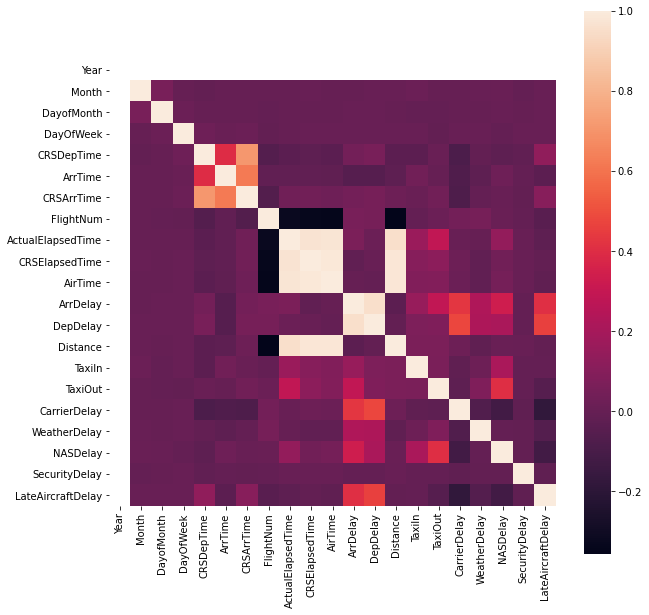

In [56]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, square=True)
plt.show()

In [44]:
df['Cancelled'].value_counts()

0    1928368
Name: Cancelled, dtype: int64

In [45]:
df['Diverted'].value_counts()

0    1928368
Name: Diverted, dtype: int64

In [47]:
df1=pd.read_csv('C:/Users/38169/Desktop/master 4.0/Masinsko ucenje/data-society-airlines-delay/airlinedelaycauses/DelayedFlights.csv', index_col=0, parse_dates=['DepTime'])

C:\Users\38169\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [48]:
df1['Cancelled'].value_counts()

0    1936125
1        633
Name: Cancelled, dtype: int64

In [51]:
df1['Diverted'].value_counts()

0    1929004
1       7754
Name: Diverted, dtype: int64

In [52]:
### since there is only 633 cancelled and 7754 diverted flights, and we want to predict ArrDelay, we decied to drop these columns

In [50]:
df.drop(['Diverted','Cancelled'], axis=1, inplace=True)

In [53]:
correlation_matrix=df.corr()

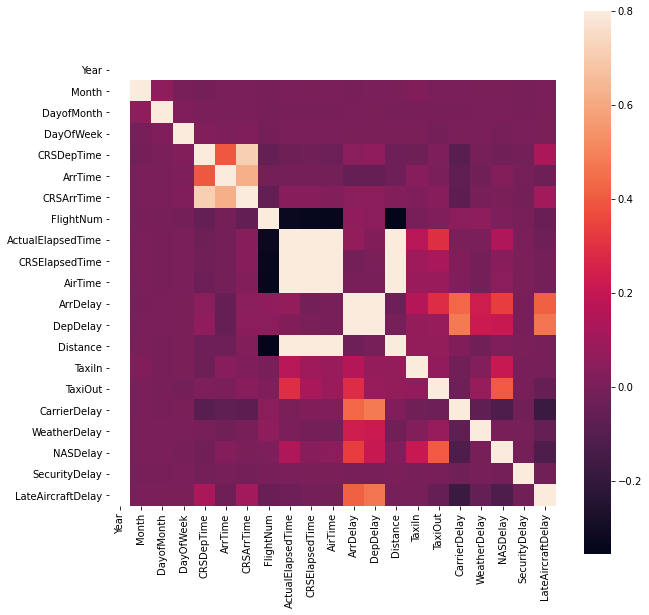

In [57]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, vmax=.8, square=True)
plt.show()

In [55]:
df['Year'].value_counts()

2008    1928368
Name: Year, dtype: int64

In [ ]:
display()

In [71]:
correlation_matrix[['ArrDelay','DepDelay']]

,ArrDelay,DepDelay
Year,NaN,NaN
Month,-0.000896,0.004234
DayofMonth,0.004124,0.005274
DayOfWeek,0.006121,0.008717
CRSDepTime,0.044449,0.059459
ArrTime,-0.050949,-0.052845
CRSArrTime,0.043079,0.054123
FlightNum,0.061263,0.052148
ActualElapsedTime,0.068130,0.018492
CRSElapsedTime,-0.015676,0.006836


In [64]:
round((df['ActualElapsedTime']-df['CRSElapsedTime']).describe(),2)

count    1928368.00
mean          -0.89
std           17.24
min         -181.00
25%          -10.00
50%           -3.00
75%            5.00
max          759.00
dtype: float64

In [67]:
round((df['CRSArrTime']-df['ArrTime']).describe(),2)

count    1928368.00
mean          23.95
std          447.69
min        -2399.00
25%          -89.00
50%          -30.00
75%           -7.00
max         2358.00
dtype: float64

In [67]:
round((df['CRSArrTime']-df['ArrTime']).describe(),2)

count    1928368.00
mean          23.95
std          447.69
min        -2399.00
25%          -89.00
50%          -30.00
75%           -7.00
max         2358.00
dtype: float64

In [65]:
round((df['ArrDelay']).describe(),2)

count    1928368.00
mean          42.20
std           56.78
min         -109.00
25%            9.00
50%           24.00
75%           56.00
max         2461.00
Name: ArrDelay, dtype: float64

In [68]:
df.drop(['Distance','AirTime'], axis=1, inplace=True)

In [69]:
correlation_matrix=df.corr()

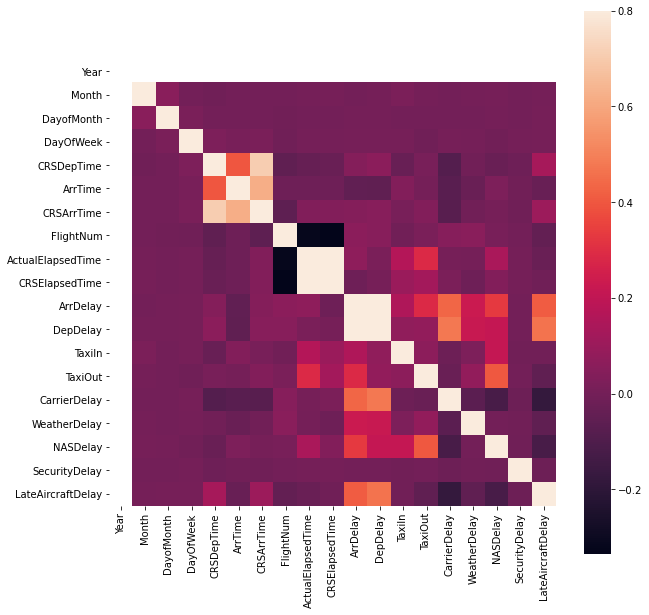

In [70]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, vmax=.8, square=True)
plt.show()

In [72]:
df.drop(['DepDelay'], axis=1, inplace=True)

In [73]:
correlation_matrix=df.corr()

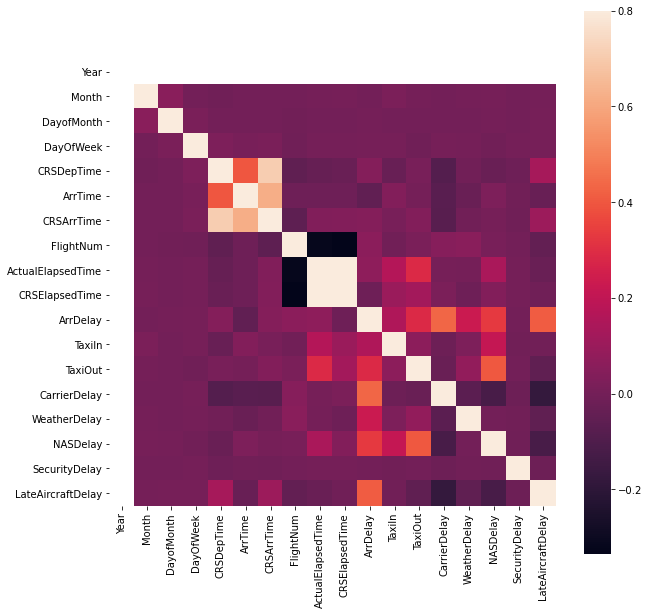

In [74]:
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, vmax=.8, square=True)
plt.show()